In [1]:
import qiskit
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
%matplotlib inline

In [2]:
n = 8
nqbits = n
nbits = n
outputCircuit = qiskit.QuantumCircuit(nqbits,nbits)

for j in range(n):
    outputCircuit.measure(j,j)

outputCircuit.draw()

┌─┐                     
q_0: ┤M├─────────────────────
     └╥┘┌─┐                  
q_1: ─╫─┤M├──────────────────
      ║ └╥┘┌─┐               
q_2: ─╫──╫─┤M├───────────────
      ║  ║ └╥┘┌─┐            
q_3: ─╫──╫──╫─┤M├────────────
      ║  ║  ║ └╥┘┌─┐         
q_4: ─╫──╫──╫──╫─┤M├─────────
      ║  ║  ║  ║ └╥┘┌─┐      
q_5: ─╫──╫──╫──╫──╫─┤M├──────
      ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ─╫──╫──╫──╫──╫──╫─┤M├───
      ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ─╫──╫──╫──╫──╫──╫──╫─┤M├
      ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/═╩══╩══╩══╩══╩══╩══╩══╩═
      0  1  2  3  4  5  6  7

In [3]:
encodeCircuit = QuantumCircuit(n)
encodeCircuit.x(4) #16
encodeCircuit.x(2) #4

encodeCircuit.draw()

q_0: ─────
          
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘
q_3: ─────
     ┌───┐
q_4: ┤ X ├
     └───┘
q_5: ─────
          
q_6: ─────
          
q_7: ─────

In [4]:
circuit = encodeCircuit + outputCircuit
circuit.draw()

┌─┐                  
q_0: ─────┤M├──────────────────
          └╥┘┌─┐               
q_1: ──────╫─┤M├───────────────
     ┌───┐ ║ └╥┘         ┌─┐   
q_2: ┤ X ├─╫──╫──────────┤M├───
     └───┘ ║  ║ ┌─┐      └╥┘   
q_3: ──────╫──╫─┤M├───────╫────
     ┌───┐ ║  ║ └╥┘       ║ ┌─┐
q_4: ┤ X ├─╫──╫──╫────────╫─┤M├
     └┬─┬┘ ║  ║  ║        ║ └╥┘
q_5: ─┤M├──╫──╫──╫────────╫──╫─
      └╥┘  ║  ║  ║ ┌─┐    ║  ║ 
q_6: ──╫───╫──╫──╫─┤M├────╫──╫─
       ║   ║  ║  ║ └╥┘┌─┐ ║  ║ 
q_7: ──╫───╫──╫──╫──╫─┤M├─╫──╫─
       ║   ║  ║  ║  ║ └╥┘ ║  ║ 
c: 8/══╩═══╩══╩══╩══╩══╩══╩══╩═
       5   0  1  3  6  7  2  4

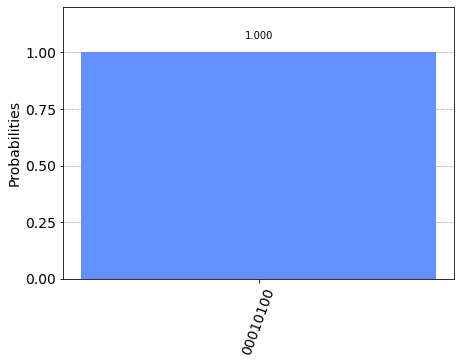

In [5]:
counts = execute(circuit,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)